# Predicting House Prices Using Scikit-Learn

In this notebook,we shall use data on 21,000+ houses in US to build a model to predict house prices

In [1]:
#Let's start by importing a few modules/libraries that we will need
import pandas as pd, numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Step1:  Analyze the Data


In [2]:
#Read the data into Pandas, to keep the analysis fast and simple
df=pd.read_csv("/data/house.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Let's look at the data types that Pandas has infered

In [4]:
df.dtypes 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Let's take a quick look at the properties of each column of data

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#simple checks
print("shape of data is ", df.shape)

shape of data is  (21613, 21)


### You may want to do a few simple plots for obvious patterns

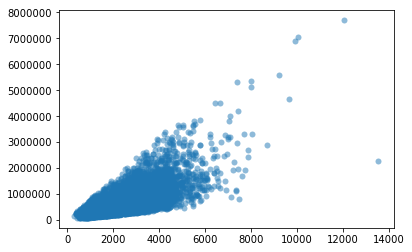

In [7]:
#Let's start simple
plt.scatter(df['sqft_living'], df['price'],linewidths =0, alpha=0.5)

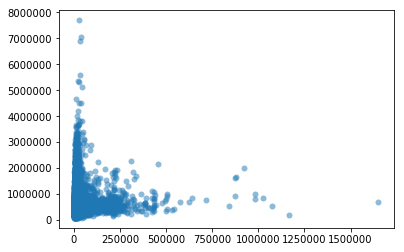

In [8]:
plt.scatter(df['sqft_lot'], df['price'],linewidths =0, alpha=0.5)

### Let's plot the correlation matrix to see linear relationships between columns

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


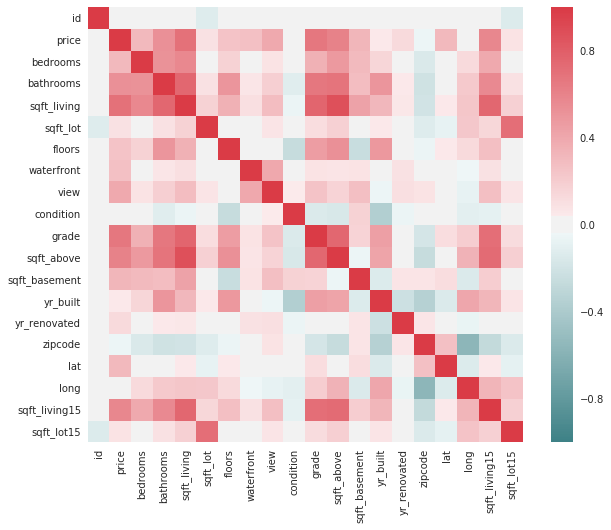

In [9]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200, 10, as_cmap=True),
            square=True, ax=ax)

# On to some quick modeling

In [10]:
all_features_target=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [11]:
# Let's start simpe, with a few feature columns i.e. the usual suspects
feature_set1=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

In [12]:
X=np.array(df[feature_set1])
y=np.array(df['price'])
s=StandardScaler()
XX=s.fit_transform(X)
XX.shape, y.shape

((21613, 5), (21613,))

In [13]:
print("check zero mean", np.round(XX.mean(axis=0),2) )
print("check Unit Stdev", np.round(XX.std(axis=0),2) )

check zero mean [ 0. -0.  0.  0. -0.]
check Unit Stdev [ 1.  1.  1.  1.  1.]


### Train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=42)
for i in [X_train, X_test, y_train, y_test]: print(i.shape)

(16209, 5)
(5404, 5)
(16209,)
(5404,)


#### Regular 'Score' that comes from most regression models in Scikit is r<sup>2</sup>. Let's define a function to print RMSE scores

In [15]:
import math
def print_rmse(model, x, y):
    rmse=math.sqrt(mean_squared_error(model.predict(x), y))
    print("RMSE is ", rmse)

In [16]:
%%time
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print("r-square: ", regr.score( X_test, y_test))
print_rmse(regr, X_test, y_test)

r-square:  0.51235445976
RMSE is  270084.68648585695
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 46.3 ms


In [17]:
%%time
#create a K Neighbours model. Prediction is the average of the 10 nearest neighbours
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(10)
KNN.fit(X_train, y_train)
print("r-square: ", KNN.score( X_test, y_test))
print_rmse(KNN, X_test, y_test)

r-square:  0.551257547136
RMSE is  259087.47066383396
CPU times: user 340 ms, sys: 4 ms, total: 344 ms
Wall time: 344 ms


In [18]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)
print("r-square: ", gbr.score( X_test, y_test))
print_rmse(gbr, X_test, y_test)

r-square:  0.565350185271
RMSE is  254986.7314114229
CPU times: user 4 s, sys: 0 ns, total: 4 s
Wall time: 4.02 s


## Let's improve the model, by increasing features

In [19]:
feature_set2=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'lat', 'long']

In [20]:
X=np.array(df[feature_set2])
y=np.array(df['price'])
s=StandardScaler()
XX=s.fit_transform(X)
XX.shape, y.shape

((21613, 7), (21613,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=42)
for i in [X_train, X_test, y_train, y_test]: print(i.shape)

(16209, 7)
(5404, 7)
(16209,)
(5404,)


In [22]:
%%time
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print("r-square: ", regr.score( X_test, y_test))
print_rmse(regr, X_test, y_test)

r-square:  0.591135412034
RMSE is  247307.6674549046
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 5.6 ms


In [23]:
%%time
#create a K Neighbours model. Prediction is the average of the 10 nearest neighbours
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(10)
KNN.fit(X_train, y_train)
print("r-square: ", KNN.score( X_test, y_test))
print_rmse(KNN, X_test, y_test)

r-square:  0.750180888193
RMSE is  193312.82276331823
CPU times: user 624 ms, sys: 0 ns, total: 624 ms
Wall time: 622 ms


In [24]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)
print("r-square: ", gbr.score( X_test, y_test))
print_rmse(gbr, X_test, y_test)

r-square:  0.778525931556
RMSE is  182015.8777324025
CPU times: user 5.75 s, sys: 0 ns, total: 5.75 s
Wall time: 5.75 s


### Let's include some categorial variables too

In [25]:
all_features_target=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                     'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
                     'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


feature_set_num=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                 'lat', 'long', 'yr_built', 'yr_renovated', 'grade',
                'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']


feature_set_cat=['waterfront', 'view', 'condition', 'grade', 'zipcode']

In [26]:
X=np.array(df[feature_set_num])
y=np.array(df['price'])
s=StandardScaler()
XX=s.fit_transform(X)
XX.shape, y.shape

((21613, 14), (21613,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=42)
for i in [X_train, X_test, y_train, y_test]: print(i.shape)

(16209, 14)
(5404, 14)
(16209,)
(5404,)


In [28]:
%%time
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print("Regression")
print("r-square: ", regr.score( X_test, y_test))
print_rmse(regr, X_test, y_test)

Regression
r-square:  0.654343009624
RMSE is  227389.55125424347
CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 12.8 ms


In [29]:
%%time
#create a K Neighbours model. Prediction is the average of the 10 nearest neighbours
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(10)
KNN.fit(X_train, y_train)
print("10-Nearest Neighbours")
print("r-square: ", KNN.score( X_test, y_test))
print_rmse(KNN, X_test, y_test)

10-Nearest Neighbours
r-square:  0.764069157128
RMSE is  187862.5409408664
CPU times: user 2.32 s, sys: 4 ms, total: 2.32 s
Wall time: 2.32 s


In [30]:
%%time
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)
print("Boosted Gradient")
print("r-square: ", gbr.score( X_test, y_test))
print_rmse(gbr, X_test, y_test)

Boosted Gradient
r-square:  0.816182392813
RMSE is  165821.70897386884
CPU times: user 10 s, sys: 8 ms, total: 10 s
Wall time: 10 s


#### Let's try a gradient boosting run with 1000 estimators and max-depth 6

In [31]:
%%time
params = {'n_estimators': 1000, 'max_depth': 6, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)
print("Boosted Gradient")
print("r-square: ", gbr.score( X_test, y_test))
print_rmse(gbr, X_test, y_test)

Boosted Gradient
r-square:  0.838072466427
RMSE is  155635.327156142
CPU times: user 37.5 s, sys: 12 ms, total: 37.5 s
Wall time: 37.5 s


### Let's now add categorical variables as well

We need to preprocess them, for Scikit-Learn purposes. Let's first see what they look like

In [32]:
feature_set_cat=['waterfront', 'view', 'condition', 'grade', 'zipcode']
df[feature_set_cat].describe()

,waterfront,view,condition,grade,zipcode
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.007542,0.234303,3.409430,7.656873,98077.939805
std,0.086517,0.766318,0.650743,1.175459,53.505026
min,0.000000,0.000000,1.000000,1.000000,98001.000000
25%,0.000000,0.000000,3.000000,7.000000,98033.000000
50%,0.000000,0.000000,3.000000,7.000000,98065.000000
75%,0.000000,0.000000,4.000000,8.000000,98118.000000
max,1.000000,4.000000,5.000000,13.000000,98199.000000


In [33]:
def OneHotDropOne(df, colnames):
    first=1
    for col in colnames:
        Hot=OneHotEncoder()
        coded_vals=Hot.fit_transform(df[[col]])[:,:-1].todense()
        if not first:
            retval=np.hstack((retval, coded_vals))
        else:
            retval=coded_vals.copy()
            first=0
    return retval

# Let's include all categorical variables except Zipcode

r=OneHotDropOne(df, colnames=[ 'waterfront','view', 'condition', 'grade'])
r.shape

(21613, 20)

In [34]:
feature_set_num=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                 'lat', 'long', 'yr_built', 'yr_renovated', 'grade',
                'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

In [35]:
X=np.array(df[feature_set_num])
y=np.array(df['price'])
s=StandardScaler()
XX=s.fit_transform(X)
XX.shape, y.shape

((21613, 14), (21613,))

In [36]:
XXX=np.hstack((XX, r))
XXX.shape

(21613, 34)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(XXX, y, test_size=0.25, random_state=42)
for i in [X_train, X_test, y_train, y_test]: print(i.shape)

(16209, 34)
(5404, 34)
(16209,)
(5404,)


In [38]:
%%time
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print("Regression")
print("r-square: ", regr.score( X_test, y_test))
print_rmse(regr, X_test, y_test)

Regression
r-square:  0.732910473027
RMSE is  199883.18543684244
CPU times: user 16 ms, sys: 8 ms, total: 24 ms
Wall time: 30.4 ms


In [39]:
%%time
#create a K Neighbours model. Prediction is the average of the 10 nearest neighbours
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(10)
KNN.fit(X_train, y_train)
print("10-Nearest Neighbours")
print("r-square: ", KNN.score( X_test, y_test))
print_rmse(KNN, X_test, y_test)

10-Nearest Neighbours
r-square:  0.765126618476
RMSE is  187441.06049062504
CPU times: user 5.25 s, sys: 4 ms, total: 5.26 s
Wall time: 5.25 s


In [40]:
%%time
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)
print("Boosted Gradient")
print("r-square: ", gbr.score( X_test, y_test))
print_rmse(gbr, X_test, y_test)

Boosted Gradient
r-square:  0.852985282161
RMSE is  148295.59124071474
CPU times: user 16.3 s, sys: 4 ms, total: 16.3 s
Wall time: 16.3 s


## Predict function to predict House Prices

In [ ]:
this is not tested

def predict_price(house_features, s, model):
    """ Takes as input a dictionary 'house_features' with following features to predict house price:
    
    (Numerical): bedrooms, bathrooms,sqft_living, sqft_lot, floors, lat, long,'yr_built, yr_renovated,
    sqft_above, sqft_basement, sqft_living15, sqft_lot15, 
    
    (categorical):  waterfront,view, condition, grade
    """
    feature_set_num=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                 'lat', 'long', 'yr_built', 'yr_renovated', 'grade',
                'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
    
    feature_set_cat=[ 'waterfront','view', 'condition', 'grade']
    
    
    df=pd.DataFrame(house_features)
    
    inp1=s.fit_transform(np.array(df[feature_set_num]))
    inp2=OneHotDropOne(df, colnames=feature_set_cat)
    
    inp=np.hstack((inp1, inp2))
    
    return model.predict(inp)

In [ ]:
house={'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
       'lat', 'long', 'yr_built', 'yr_renovated', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
       'waterfront','view', 'condition', 'grade'
      }

predict_price(house, s, gbr)

# Hyperparameter Optimization

We know that the Gradient Boosting is outperforming the other two algorithms on the test data and also takes a lot longer, as expected. Let's see if we can further improve the GB model by selecting a good set of hyper-paramaters. 

We shall use a GridSearch with a 5-Fold cross validation for this search


<span style="color:red">This will take time, run on rorocloud </span>

In [51]:
print(XXX.shape, y.shape) #quick verify the features

(21613, 34) (21613,)


In [50]:
%%time
from sklearn.model_selection import  GridSearchCV

parameters = {'n_estimators':[250,500, 750, 1000], 'max_depth':[2,4,6,8], 
              'min_samples_split':[2, 4 ,6], 'learning_rate':[0.001, 0.01, 0.1]}

parameters = {'n_estimators':[250], 'max_depth':[2], 
              'min_samples_split':[4], 'learning_rate':[0.01]}

clf = GradientBoostingRegressor()
opt= GridSearchCV(clf,param_grid=parameters, cv=5)
opt.fit(XXX, y)

CPU times: user 20.2 s, sys: 32 ms, total: 20.2 s
Wall time: 20.2 s


In [41]:
type(XXX)

numpy.matrixlib.defmatrix.matrix

In [42]:
XXX.tofile("XXX.data")

In [43]:
!ls

CIFAR10.ipynb	       Traffic_Sign_Classifier.ipynb  XXX.data	   helper.py
MNIST_CNN.ipynb        Traffic_Signs_roro.ipynb       __pycache__
Test_Regression.ipynb  Untitled.ipynb		      anand.ipynb


In [44]:
y.tofile("y.data")

In [48]:
%%file hyper.py
from sklearn.model_selection import  GridSearchCV

XXX = np.fromfile("XXX.data")
y = np.fromfile("y.data")

parameters = {'n_estimators':[250,500, 750, 1000], 'max_depth':[2,4,6,8], 
              'min_samples_split':[2, 4 ,6], 'learning_rate':[0.001, 0.01, 0.1]}

clf = GradientBoostingRegressor()
opt= GridSearchCV(clf,param_grid=parameters, n_jobs=16, cv=5)
opt.fit(XXX, y)


Writing hyper.py


In [ ]:
!rorocloud run -i C16 hyper.py

## Option B

In [ ]:
%%time
from sklearn.model_selection import  GridSearchCV
from rorocloud.model_selection import GridSearchCV

parameters = {'n_estimators':[250,500, 750, 1000], 'max_depth':[2,4,6,8], 
              'min_samples_split':[2, 4 ,6], 'learning_rate':[0.001, 0.01, 0.1]}

clf = GradientBoostingRegressor()
opt= GridSearchCV(clf,param_grid=parameters, cv=5)
opt.fit(XXX, y)

In [49]:
import rorocloud 

ModuleNotFoundError: No module named 'rorocloud'

In [ ]:
%%rorocloud-enable